## Carbon Emission Reduction via Energy Consumption Prediction

#### 1. Import Required Libraries


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

#### 2. Load the Dataset


In [9]:
data = pd.read_csv('Delhi_Energy_Emission.csv')
print("Dataset Loaded Successfully ✅")

Dataset Loaded Successfully ✅


#### 3. Exploratory Data Analysis (EDA)


In [6]:
# Dataset Information

print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

# Statistical Summary
data.describe()

Dataset Shape: (15, 6)

Data Types:
 Year                         int64
Electricity_Consumption      int64
Peak_Demand                  int64
EV_Energy_Consumption        int64
Renewable_Share              int64
Emission_Factor            float64
dtype: object

Missing Values:
 Year                       0
Electricity_Consumption    0
Peak_Demand                0
EV_Energy_Consumption      0
Renewable_Share            0
Emission_Factor            0
dtype: int64


,Year,Electricity_Consumption,Peak_Demand,EV_Energy_Consumption,Renewable_Share,Emission_Factor
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2017.000000,30629.466667,6653.333333,175.000000,15.000000,0.794000
std,4.472136,3785.671668,387.513441,97.997813,7.653197,0.037569
min,2010.000000,25000.000000,6000.000000,50.000000,5.000000,0.730000
25%,2013.500000,27500.000000,6350.000000,92.500000,8.500000,0.765000
50%,2017.000000,30500.000000,6700.000000,160.000000,14.000000,0.800000
75%,2020.500000,33900.000000,6975.000000,245.000000,21.000000,0.820000
max,2024.000000,36000.000000,7200.000000,350.000000,28.000000,0.850000


#### 4. Energy Consumption Model Training

In [27]:
# Selecting Features and Target
X = data[["Year"]]
y = data["Electricity_Consumption"]

# Creating Linear Regression Model
model = LinearRegression()

# Training the Model
model.fit(X, y)

print("\nMachine Learning Model Trained Successfully! ✅")

# Printing Model Parameters (Important for Viva)
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)



Machine Learning Model Trained Successfully! ✅
Model Coefficient (Slope): 841.4642857142857
Model Intercept: -1666603.9976190475


#### 5. Energy Prediction & Evaluation

#### -- Model Evaluation --

In [22]:
predicted_train = model.predict(X)
r2 = r2_score(y, predicted_train)

print("\n===== Model Evaluation =====")
print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")


===== Model Evaluation =====

Model Performance:
R² Score: 0.9881


#### --- Future Energy Prediction and Forcast ---

In [20]:
future_years = pd.DataFrame({
    "Year": [2025, 2026, 2027]
})

# Predict
future_energy = model.predict(future_years)

print("\n===== Future Energy Forecast =====")
for year, energy in zip(future_years["Year"], future_energy):
    print(f"Year {year}: {energy:.2f} MU")


===== Future Energy Forecast =====
Year 2025: 37361.18 MU
Year 2026: 38202.65 MU
Year 2027: 39044.11 MU


#### 6. Carbon Emission Forecast

In [16]:
historical_carbon = data["Electricity_Consumption"] * data["Emission_Factor"]

last_emission_factor = data["Emission_Factor"].iloc[-1]
future_emission_factor = last_emission_factor - 0.01

future_carbon = future_energy * future_emission_factor

print("\n===== Future Carbon Emission Forecast =====")
for year, carbon in zip(future_years["Year"], future_carbon):
    print(f"Year {year}: {carbon:.2f} Tons CO2")


===== Future Carbon Emission Forecast =====
Year 2025: 26900.05 Tons CO2
Year 2026: 27505.90 Tons CO2
Year 2027: 28111.76 Tons CO2


#### 7. Delhi Electricity Consumption Forecast Visualization

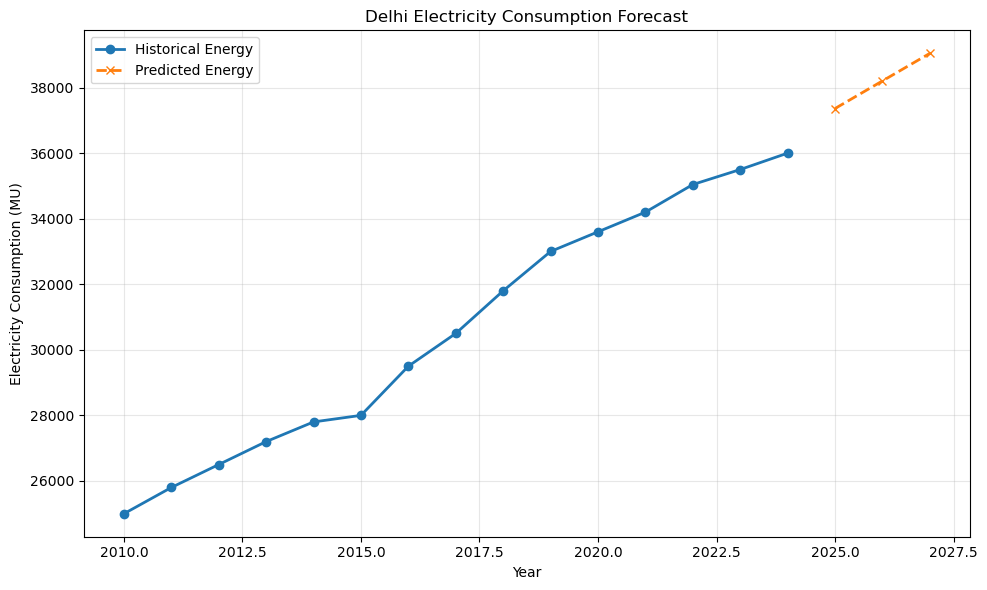

In [17]:
plt.figure(figsize=(10,6))

plt.plot(data["Year"],
         data["Electricity_Consumption"],
         marker='o',
         linewidth=2,
         label="Historical Energy")

plt.plot(future_years["Year"],
         future_energy,
         marker='x',
         linestyle='--',
         linewidth=2,
         label="Predicted Energy")

plt.xlabel("Year")
plt.ylabel("Electricity Consumption (MU)")
plt.title("Delhi Electricity Consumption Forecast")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 8. Delhi Carbon Emission Forecast Visualization


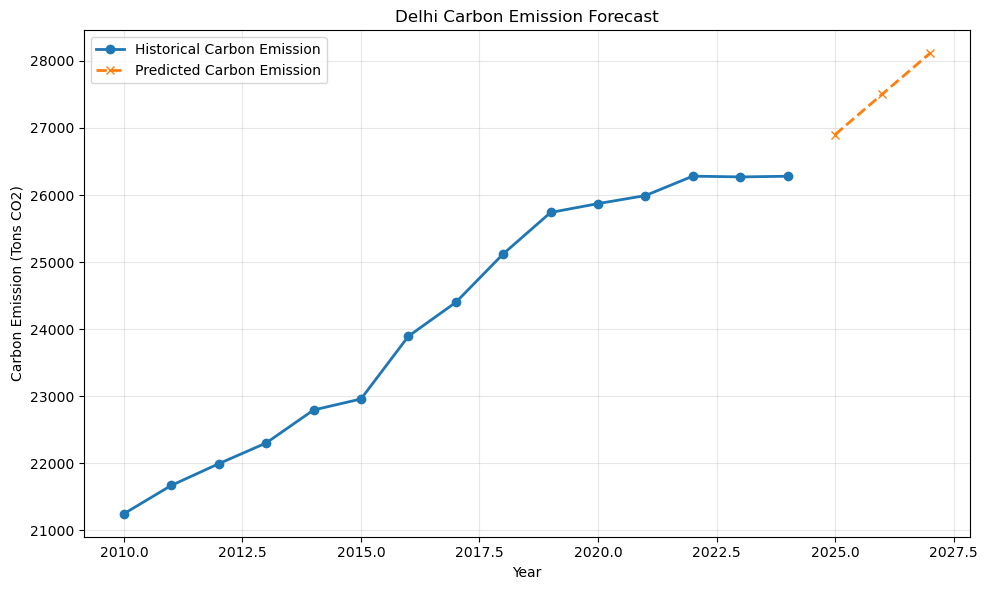

In [40]:

plt.figure(figsize=(10,6))

plt.plot(data["Year"],
         historical_carbon,
         marker='o',
         linewidth=2,
         label="Historical Carbon Emission")

plt.plot(future_years["Year"],
         future_carbon,
         marker='x',
         linestyle='--',
         linewidth=2,
         label="Predicted Carbon Emission")

plt.xlabel("Year")
plt.ylabel("Carbon Emission (Tons CO2)")
plt.title("Delhi Carbon Emission Forecast")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 9. Data-Driven Project Conclusion Summary


In [54]:
print("\n" + "="*60)
print("📊 DATA-DRIVEN PROJECT CONCLUSION")
print("="*60)

print(f"\nElectricity increased from {data['Electricity_Consumption'].iloc[0]} MU in {data['Year'].iloc[0]}")
print(f"to {data['Electricity_Consumption'].iloc[-1]} MU in {data['Year'].iloc[-1]}.")

print("\nRenewable share improved over time, reducing emission factor.")
print("However, increasing electricity demand continues to impact carbon levels.")

print("\nFuture prediction indicates continued growth in demand.")
print("Therefore, renewable expansion must accelerate to achieve carbon reduction.")

print("\n Analysis Completed Successfully.")
print("="*60)


📊 DATA-DRIVEN PROJECT CONCLUSION

Electricity increased from 25000 MU in 2010
to 36000 MU in 2024.

Renewable share improved over time, reducing emission factor.
However, increasing electricity demand continues to impact carbon levels.

Future prediction indicates continued growth in demand.
Therefore, renewable expansion must accelerate to achieve carbon reduction.

 Analysis Completed Successfully.
